# Imports and font/color setup

In [1]:
import random

In [2]:
import pandas as pd, numpy as np, string, re
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.font_manager as fm 
from datetime import timedelta, datetime as dt
import matplotlib.gridspec as gridspec
%matplotlib inline
# %matplotlib notebook

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [5]:
def get_colors(cmap, n, start=0.0, stop=1.0, alpha=1.0, reverse=False):
    import matplotlib.cm as cm, numpy as np 
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [6]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print('\n'.join(color for color in colors)) 

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


# General top artists/songs analysis

In [6]:
artists_most = pd.read_csv('Spreadsheets/sidsaxena_top_artists.csv')

In [8]:
artists_most = artists_most.set_index('artist')['play_count'].head(25)

In [9]:
artists_most.head()

artist
John Mayer         6920
Radiohead          6010
Porcupine Tree     2146
The Paper Kites    1876
Steven Wilson      1702
Name: play_count, dtype: int64

In [10]:
artists_most

artist
John Mayer               6920
Radiohead                6010
Porcupine Tree           2146
The Paper Kites          1876
Steven Wilson            1702
The Seatbelts            1473
Blackfield               1455
Tycho                    1245
Muse                     1114
Red Hot Chili Peppers    1083
The Killers              1027
The Pineapple Thief      1011
::M∆DE::IN::HEIGHTS::     987
City and Colour           842
Owl City                  823
The Midnight              710
Eden                      651
Alvvays                   644
Bryan Adams               571
The xx                    531
Oh Wonder                 479
Tomohito Nishiura         440
Brolly                    434
The Kooks                 429
Cake                      415
Name: play_count, dtype: int64

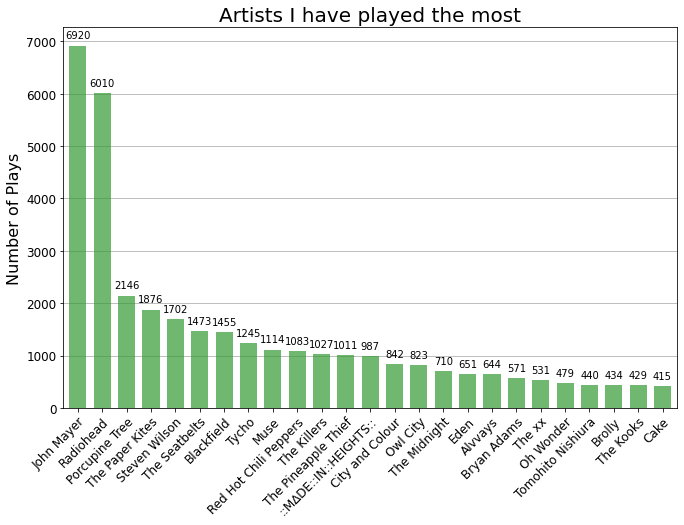

In [8]:
ax = artists_most.plot(kind = 'bar', figsize = (11,7), width=0.7, alpha=0.7, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode = 'anchor', ha='right', fontproperties=ticks_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)

ax.set_xlabel('', fontproperties = label_font)
ax.set_ylabel('Number of Plays', fontproperties=label_font)

plt.savefig('images/sidsaxena-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [12]:
tracks_most = pd.read_csv('Spreadsheets/sidsaxena_top_tracks.csv')

In [13]:
# if name too long, shorten it
def make_label(row, maxlength = 30, suffix= '...'):
    artist = row['artist']
    track = row['track']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength - len(suffix)], suffix)
    
    return '{}\n{}'.format(artist, track)

In [14]:
index = tracks_most.apply(make_label, axis='columns')

tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')

tracks_most = tracks_most['play_count'].head(20)

tracks_most.head()

The Paper Kites\nRevelator Eyes     327
Porcupine Tree\nTrains              221
The Paper Kites\nElectric Indigo    187
The Paper Kites\nBleed Confusion    172
Radiohead\nNo Surprises             164
Name: play_count, dtype: int64

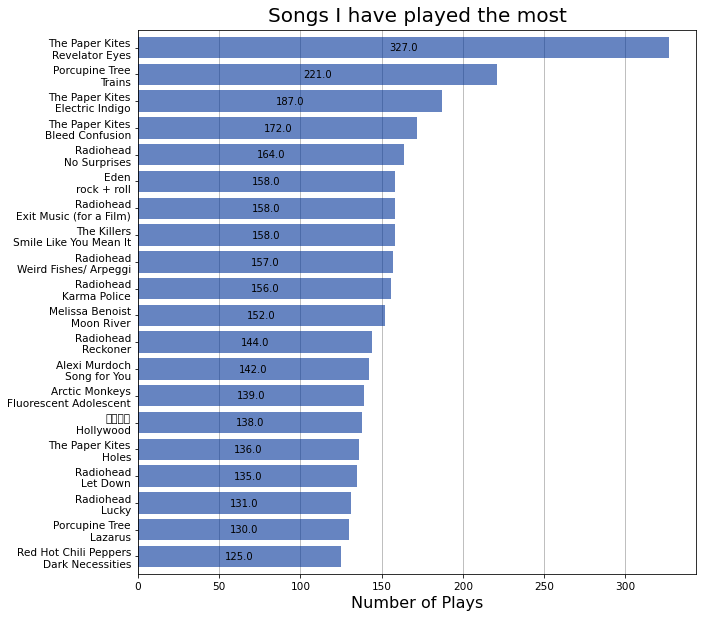

In [12]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=(10,10), width=0.8, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.xaxis.grid(True)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')

ax.set_xlabel('Number of Plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)

ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/sidsaxena-tracks-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

In [5]:
albums_most = pd.read_csv('Spreadsheets/sidsaxena_top_albums.csv')

In [6]:
def make_label(row, maxlength = 25, suffix='...'):
    artist = row['artist']
    track = row['album']
    if len(track) > maxlength:
        track = '{}{}'.format(track[:maxlength - len(suffix)], suffix)
    return '{}\n{}'.format(artist, track)

index = albums_most.apply(make_label, axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

The Paper Kites\nTwelvefour              1193
Radiohead\nOK Computer                    875
John Mayer\nBorn and Raised               782
John Mayer\nWhere The Light Is: Jo...     727
John Mayer\nContinuum                     719
Name: play_count, dtype: int64

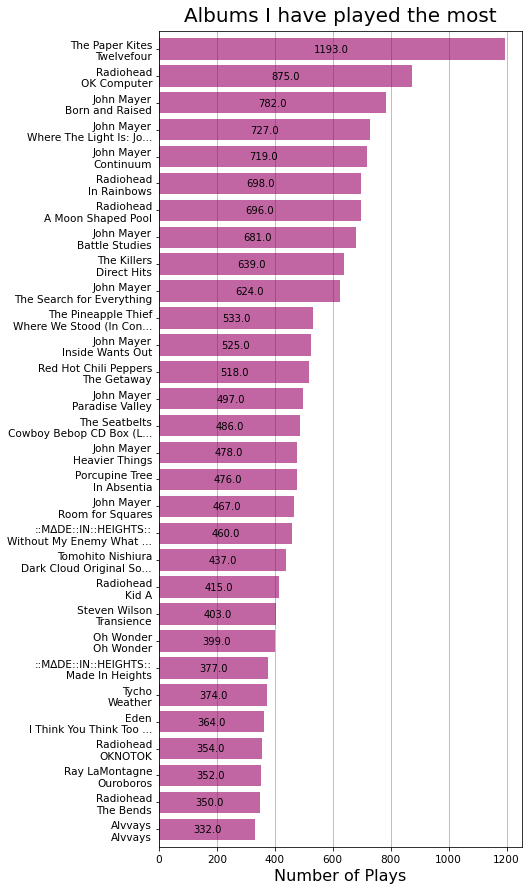

In [15]:
ax = albums_most.sort_values().plot(kind='barh', figsize=(6.5, 15), width=0.8, alpha=0.6, color='#990066', edgecolor=None, zorder=2)

ax.xaxis.grid(True)

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')

ax.set_xlabel('Number of Plays', fontproperties = label_font)
ax.set_ylabel('', fontproperties=label_font)

ax.set_title('Albums I have played the most', fontproperties = title_font, y=1.005)

plt.savefig('images/sidsaxena-albums-played-most-h.png', dpi=96, bbox_inches='tight')

plt.show()

In [6]:
scrobbles = pd.read_csv('Spreadsheets/SidSaxena_scrobbles_2020-08-25.csv')

scrobbles = scrobbles.drop('timestamp', axis=1)

print('{:,} total scrobbles'.format(len(scrobbles)))
print('{:,} total artists'.format(len(scrobbles['artist'].unique())))

82,906 total scrobbles
5,445 total artists


In [7]:
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])
scrobbles = scrobbles.drop('datetime', axis=1)
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize('UTC')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_convert('Asia/Kolkata')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize(None)

In [8]:
scrobbles['year'] = scrobbles['timestamp'].apply(lambda time: time.year)
scrobbles['month'] = scrobbles['timestamp'].apply(lambda time: time.month)
scrobbles['year-month'] = scrobbles['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
scrobbles['day'] =  scrobbles['timestamp'].apply(lambda time: time.day)
scrobbles['hour'] = scrobbles['timestamp'].apply(lambda time: time.hour)
scrobbles['dow'] = scrobbles['timestamp'].apply(lambda time: time.dayofweek)


dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

scrobbles['dow'] = scrobbles['dow'].map(dmap)

In [10]:
scrobbles

,artist,artist_mbid,album,album_mbid,track,track_mbid,timestamp,year,month,year-month,day,hour,dow
0,Matt Berninger,991813f5-27c6-4ff3-88dd-90e750dad545,Serpentine Prison,beae8ac9-8ec6-4efa-83d4-0c7c0c4d9da0,Serpentine Prison,2305323b-6ce7-4622-aa38-f3273ba01fae,2020-08-25 16:55:07,2020,8,2020-08,25,16,Tue
1,Geotic,780640e6-cfcb-431f-b5a6-865200dd35a7,Traversa,944d9aa0-5cff-4ba3-9a9e-85116d6f8d98,Gondolier,ac762fe5-677b-40dd-bae2-ed279417eca6,2020-08-25 16:49:53,2020,8,2020-08,25,16,Tue
2,Sticky Fingers,1063a13c-9649-4e37-a816-3c0772129aba,Land Of Pleasure,8cc4a2b9-2e8d-42e2-8e0d-d9345b5d5492,Rum Rage,93bfb404-84cb-4ed7-9e75-e4f9ee98d37f,2020-08-25 16:45:45,2020,8,2020-08,25,16,Tue
3,Declan McKenna,8b98035f-fbd2-4fb3-9c2f-263c7506680d,MOOMINVALLEY (Official Soundtrack),NaN,In Blue,9e36db4a-8dab-4d5a-a692-7e0023dc4c6c,2020-08-25 16:40:56,2020,8,2020-08,25,16,Tue
4,Winnetka Bowling League,NaN,On The 5,05184a03-e807-4629-8265-4a650594f525,On The 5,73bf701b-b255-4aba-a546-9ffae186ab3f,2020-08-25 16:38:02,2020,8,2020-08,25,16,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82901,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 12:21:20,2016,10,2016-10,8,12,Sat
82902,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 12:18:06,2016,10,2016-10,8,12,Sat
82903,XYLØ,8306a3d9-35f5-4d78-85cf-7b0f7b9873a9,NaN,NaN,Dead End Love,f4184eda-d7e4-4133-b10c-5e90954f2eaa,2016-10-08 12:15:48,2016,10,2016-10,8,12,Sat
82904,Lauv,c0ef2ba5-a7b7-40ea-bd27-30acccfcac11,NaN,NaN,Breathe,a087c4ea-09bf-45f4-8989-15aaef1c7709,2016-10-08 12:13:52,2016,10,2016-10,8,12,Sat


In [21]:
year_counts = scrobbles['year'].value_counts().sort_index()

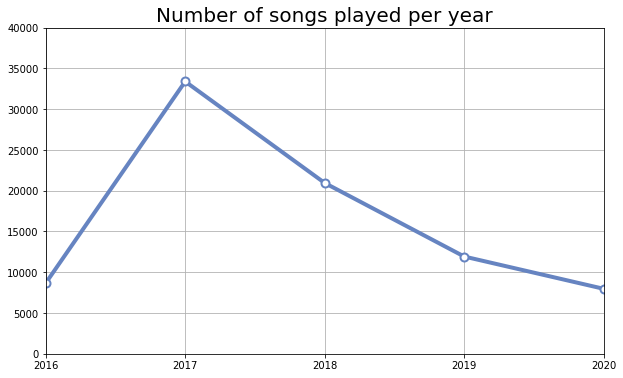

In [83]:
year_counts = scrobbles['year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=(10,6), linewidth=4, alpha=1, marker='o', color='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_ylim(0, 40000)
ax.set_xticks(year_counts.index)
ax.set_ylabel('', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)

ax.set_title('Number of songs played per year', fontproperties=title_font)

plt.savefig('images/sidsaxena-scrobbles-per-year', dpi=96, bbox_inches='tight')
plt.show()

In [22]:
min_year = min(scrobbles['year'])
max_year = max(scrobbles['year'])
years = scrobbles['year'].unique()[::-1].tolist()

In [23]:
month_counts = scrobbles['month'].value_counts().sort_index()
month_counts

1     7404
2     6060
3     8134
4     7022
5     6062
6     6149
7     6578
8     7441
9     6155
10    7582
11    6463
12    7856
Name: month, dtype: int64

In [24]:
idx = []

In [25]:
for year in years:
    idx.append((scrobbles['month'][scrobbles['year'] == year]).value_counts().sort_index())

In [26]:
mcounts = pd.concat([idx[0], idx[1], idx[2], idx[3], idx[4]])

In [27]:
from collections import defaultdict
monthly_counts = defaultdict(list)

for i in range(len(idx)):
    for j in range(len(idx[i])):
        monthly_counts.setdefault(idx[i].index[j], []).append(idx[i].values[j])        

monthly_counts

defaultdict(list,
            {10: [1814, 2321, 2280, 1167],
             11: [2540, 2053, 1108, 762],
             12: [4309, 1851, 1232, 464],
             1: [2848, 2378, 1317, 861],
             2: [2350, 1483, 1173, 1054],
             3: [3751, 1322, 1530, 1531],
             4: [3372, 1780, 1010, 860],
             5: [2924, 1574, 586, 978],
             6: [3181, 1411, 701, 856],
             7: [3025, 1982, 636, 935],
             8: [3237, 2139, 1170, 895],
             9: [2483, 2260, 1412]})

In [28]:
date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range).tolist()
mcounts.index = index

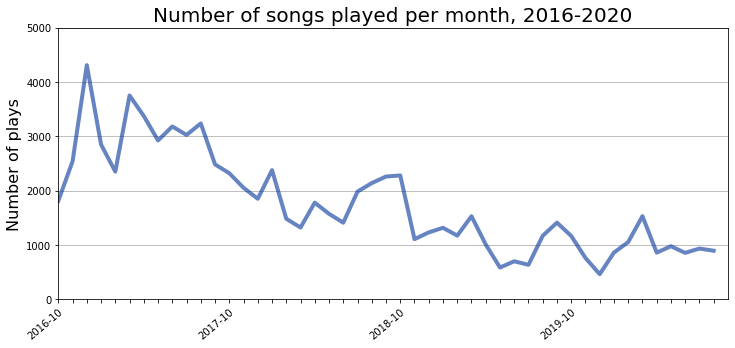

In [94]:
ax = mcounts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = mcounts.iloc[range(0, len(mcounts), 12)].index
xlabels = [x if x in xlabels else '' for x in mcounts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(mcounts)))

ax.yaxis.grid(True)
ax.set_ylim((0,5000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

In [29]:
month_counts = scrobbles['year-month'].value_counts().sort_index()

date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

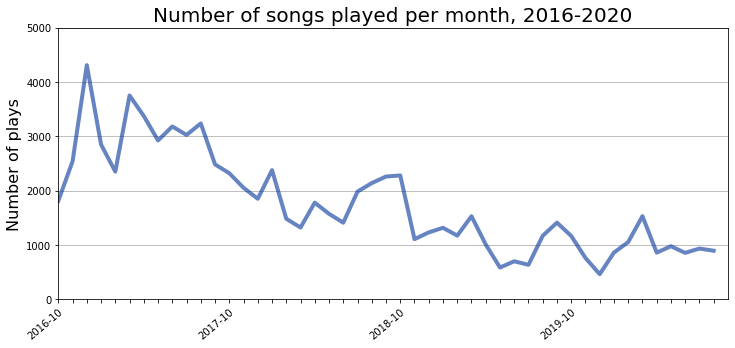

In [202]:
ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)))

ax.yaxis.grid(True)
ax.set_ylim((0,5000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month, {}-{}'.format(min_year, max_year), fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

In [30]:
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [31]:
dow_counts

Monday       12060
Tuesday      11643
Wednesday    11017
Thursday     11168
Friday       12091
Saturday     12240
Sunday       12687
Name: dow, dtype: int64

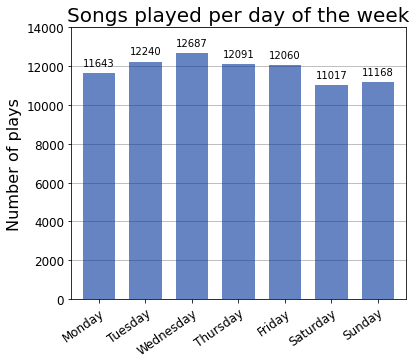

In [97]:
ax = dow_counts.plot(kind='bar', figsize=[6, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, 14000))
ax.set_title('Songs played per day of the week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('images/lastfm-scrobbles-per-weekday.png', dpi=96, bbox_inches='tight')
plt.show()

In [32]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
max(hour_counts)

6109

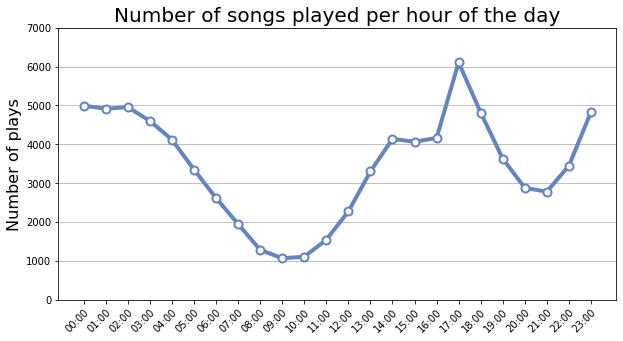

In [99]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0, 7000))

ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

In [35]:
day_hour_counts = scrobbles.groupby(['dow', 'hour']).count()['track']
hour_numbers = day_hour_counts.index.levels[1]
day_numbers = day_hour_counts.index.levels[0]
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [36]:
day_numbers

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object', name='dow')

In [20]:
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

NameError: name 'day_numbers' is not defined

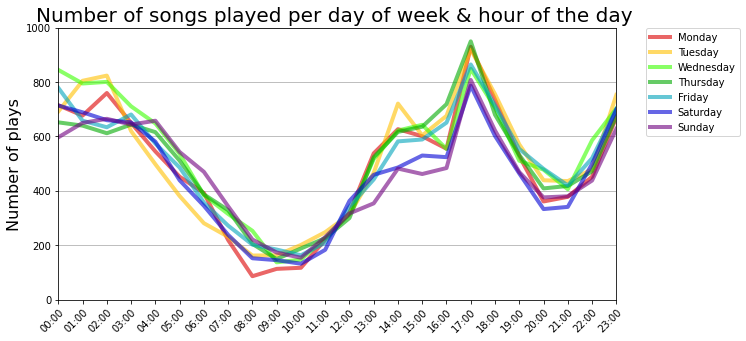

In [149]:
fig, ax = plt.subplots(figsize=[10, 6])
lines = []
for day, c in zip(day_numbers, colors):
    ax = day_hour_counts[day].plot(kind='line', figsize=[10, 5], linewidth=4, alpha=0.6, color=c)
    lines.append(day_names[day])

xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim(hour_numbers[0], hour_numbers[-1])

ax.yaxis.grid(True)

ax.set_ylim([0, 1000])
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per day of week & hour of the day ', fontproperties=title_font)

ax.legend(lines, loc='best', bbox_to_anchor=(1.23,1.017))

plt.savefig('images/lastfm-scrobbles-days-hours.png', dpi=96, bbox_inches='tight')
plt.show()

In [181]:
artists = scrobbles['artist'].value_counts()

artists = pd.DataFrame(artists.reset_index().rename(columns={'index': 'artist', 'artist': 'play count'}))

artists.index = [n + 1 for n in artists.index]
artists.head(25)

,artist,play count
1,John Mayer,6925
2,Radiohead,6011
3,Porcupine Tree,2148
4,The Paper Kites,1871
5,Steven Wilson,1702
6,The Seatbelts,1469
7,Blackfield,1456
8,Tycho,1245
9,Muse,1114
10,Red Hot Chili Peppers,1082


In [180]:
tracks = scrobbles.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)

tracks = tracks.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]

tracks.index = [n + 1 for n in tracks.index]

tracks.head(25)

,artist,track,play count
1,The Paper Kites,Revelator Eyes,328
2,Porcupine Tree,Trains,221
3,The Paper Kites,Electric Indigo,188
4,The Paper Kites,Bleed Confusion,172
5,Radiohead,No Surprises,164
6,The Killers,Smile Like You Mean It,158
7,Eden,rock + roll,158
8,Radiohead,Exit Music (for a Film),158
9,Radiohead,Weird Fishes/ Arpeggi,157
10,Radiohead,Karma Police,156


In [183]:
albums = scrobbles.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums = albums.reset_index().rename(columns={'timestamp': 'play count'})[['artist', 'album', 'play count']]
albums.index = [n+1 for n in albums.index]

In [185]:
albums.head(25)

,artist,album,play count
1,The Paper Kites,Twelvefour,1191
2,Radiohead,OK Computer,875
3,John Mayer,Born and Raised,782
4,John Mayer,Where The Light Is: John Mayer Live In Los Ang...,727
5,John Mayer,Continuum,722
6,Radiohead,In Rainbows,698
7,Radiohead,A Moon Shaped Pool,696
8,John Mayer,Battle Studies,682
9,The Killers,Direct Hits,640
10,John Mayer,The Search for Everything,624


In [37]:
scrobbles_month = scrobbles[scrobbles['year-month'].isin(['2017-03'])]

In [38]:
artists_month = scrobbles_month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Radiohead,810
2,John Mayer,589
3,The Seatbelts,429
4,Tomohito Nishiura,169
5,Owl City,91
6,Marcin Przybyłowicz,69
7,Muse,57
8,Adam Skorupa,52
9,Mikolai Stroinski,48
10,The Antlers,44


In [212]:
tracks_month = scrobbles_month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(25)

,artist,track,play count
1,Radiohead,No Surprises,48
2,The Seatbelts,Waltz For Zizi,45
3,Radiohead,Decks Dark,45
4,John Mayer,Wheel,35
5,John Mayer,Emoji of a Wave,32
6,John Mayer,In Repair,30
7,Radiohead,Everything in Its Right Place,27
8,Radiohead,Reckoner,27
9,The Seatbelts,Goodnight Julia,26
10,Radiohead,True Love Waits,26


In [213]:
albums_month = scrobbles_month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Radiohead,A Moon Shaped Pool,190
2,Tomohito Nishiura,Dark Cloud Original Soundtrack,169
3,The Seatbelts,Cowboy Bebop CD Box (Limited Edition),163
4,Radiohead,OK Computer,116
5,John Mayer,Where The Light Is: John Mayer Live In Los Ang...,107
6,John Mayer,Continuum,95
7,Radiohead,Kid A,88
8,John Mayer,Heavier Things,87
9,Radiohead,The Bends,79
10,The Seatbelts,Cowboy Bebop,73


In [271]:
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']

# make sure we have each year represented for each artist, even if they got no plays that year
plays = plays.unstack().T.fillna(method='ffill').T.stack()
top_artists = plays.index.levels[0]

In [21]:
colors = get_colors('Dark2', n)

NameError: name 'n' is not defined

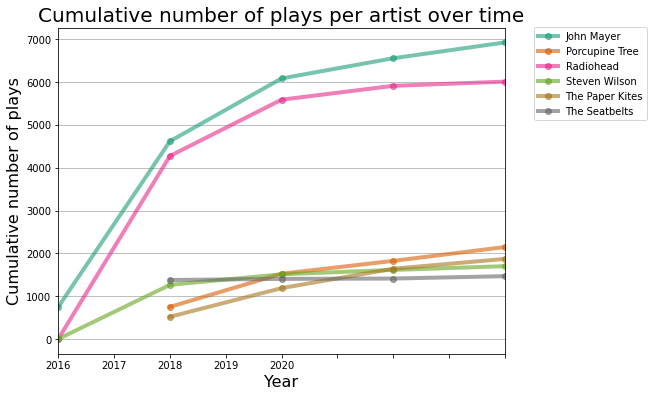

In [273]:
fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.33, 1.016))

plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

In [280]:
artists_clean = scrobbles['artist'].str.replace('The ','').str.replace('A ', '')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

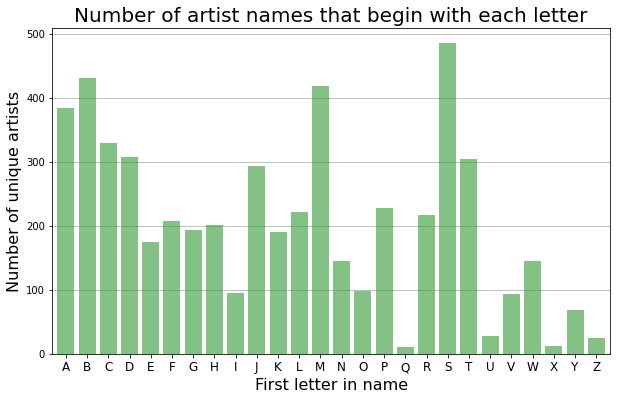

In [283]:
ax = first_letters.plot(kind='bar', figsize=[10,6], width = 0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)

ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')

plt.show()

In [286]:
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

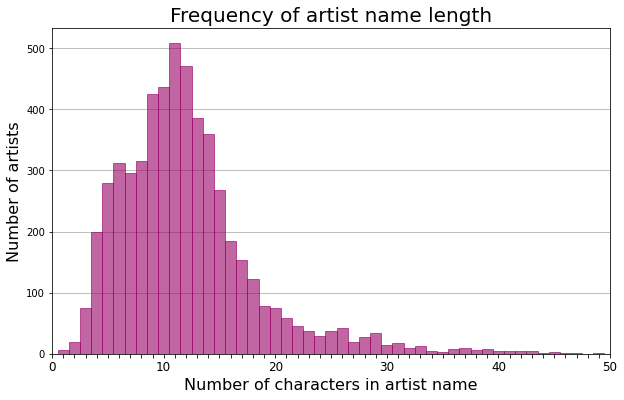

In [287]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()

In [9]:
features = pd.read_csv('D:\development\music-analysis\spotify\Spreadsheets\Scrobbles with Features (69126).csv')

In [10]:
features['timestamp'] = pd.to_datetime(features['datetime'])
features = features.drop('datetime', axis=1)
features['timestamp'] = features['timestamp'].dt.tz_localize('UTC')
features['timestamp'] = features['timestamp'].dt.tz_convert('Asia/Kolkata')
features['timestamp'] = features['timestamp'].dt.tz_localize(None)

In [11]:
features['year'] = features['timestamp'].dt.year
features['month'] = features['timestamp'].dt.month
features['year-month'] = features['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
features['week'] = features['timestamp'].dt.week
features['day'] =  features['timestamp'].dt.day
features['hour'] = features['timestamp'].dt.hour
features['dow'] = features['timestamp'].dt.dayofweek


dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# features['dow'] = features['dow'].map(dmap)

In [12]:
keymap = {0: 'C', 1: 'C♯/D♭', 2: 'D', 3: 'D♯/E♭', 4: 'E/F♭', 5: 'F/E♯', 6: 'F♯/G♭', 7: 'G', 8: 'G♯/A♭', 9: 'A', 10: 'A♯/B♭',  11: 'B/C♭'}

features['key'] = features['key'].map(keymap)

features['length in mins'] = features['length']/60000

In [13]:
features = features.set_index('timestamp')

In [14]:
features.sample(5)

,artist,track,album,release_date,genres,length,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month,year-month,week,day,hour,dow,length in mins
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-09 13:10:45,Alvvays,Your Type,Antisocialites,2017-09-08,"['art pop', 'indie pop', 'indie rock', 'shoega...",123546.0,42.0,0.208,0.922,D,-3.553,1.0,0.0937,0.000214,0.195000,0.0693,0.292,199.809,4.0,2020,5,2020-05,19,9,13,5,2.059100
2017-10-24 20:38:29,Radiohead,Bangers + Mash,In Rainbows (Disk 2),2007-12-03,"['alternative rock', 'art rock', 'melancholia'...",199502.0,43.0,0.637,0.980,A,-4.981,0.0,0.1150,0.030700,0.000657,0.6010,0.650,135.991,4.0,2017,10,2017-10,43,24,20,1,3.325033
2017-08-02 06:48:25,Sigur Rós,Glósóli,Takk...,2005-09-12,"['bow pop', 'compositional ambient', 'dream po...",375933.0,40.0,0.150,0.754,G,-6.980,1.0,0.0553,0.056300,0.935000,0.1080,0.295,148.493,4.0,2017,8,2017-08,31,2,6,2,6.265550
2018-12-29 14:03:54,John Mayer,Waiting On The World To Change,Continuum,2006-09-11,"['neo mellow', 'pop', 'pop rock', 'singer-song...",201173.0,75.0,0.577,0.756,D,-5.820,1.0,0.1150,0.159000,0.000232,0.2490,0.663,176.750,4.0,2018,12,2018-12,52,29,14,5,3.352883
2016-10-09 20:05:46,Crywolf,Shrike,Dysphoria,2015-06-23,"['chillstep', 'edm', 'indie poptimism', 'melod...",208359.0,34.0,0.409,0.807,A,-6.256,0.0,0.0310,0.049800,0.005320,0.2410,0.190,99.995,4.0,2016,10,2016-10,40,9,20,6,3.472650


In [16]:
seventeen = features['2017']
eighteen = features['2018']
nineteen = features['2019']

In [17]:
monthly_17 = seventeen.resample('M').mean()
monthly_18 = eighteen.resample('M').mean()
monthly_19 = nineteen.resample('M').mean()

In [18]:
mar_17 = features['2017-03']
apr_17 = features['2017-04']
may_17 = features['2017-05']

In [19]:
daily_mar = mar_17.resample('D').mean()
daily_apr = apr_17.resample('D').mean()
daily_may = may_17.resample('D').mean()

In [20]:
daily_apr = daily_apr.append(pd.Series(name='2017-04-31'))

In [29]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print('\n'.join(color for color in colors)) 

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


In [22]:
x_indexes = np.arange(len(daily_may))
width = 0.25

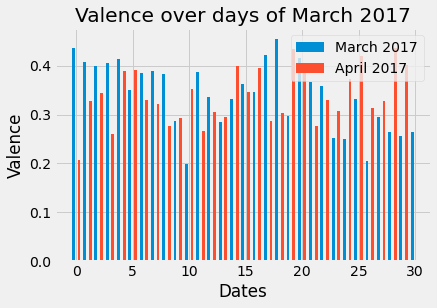

In [23]:
plt.bar(x_indexes - width, daily_mar['valence'], label='March 2017', width=width)
plt.title('Valence over days of March 2017')
plt.xlabel('Dates')
plt.ylabel('Valence')
plt.bar(x_indexes + width, daily_apr['valence'], label='April 2017', width=width)
# plt.tight_layout() 
plt.legend()

# plt.xticks(ticks=x_indexes, labels=samplemonth['day'][::-1])

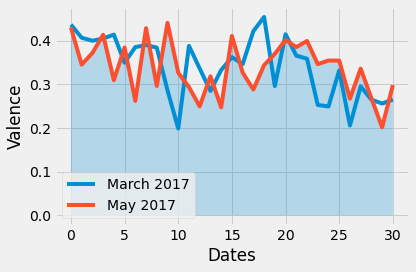

In [209]:
fig, ax = plt.subplots()
ax.plot(daily_mar['valence'].values, label='March 2017')
# ax.plot(daily_apr['valence'].values, label='April 2017')
ax.plot(daily_may['valence'].values, label='May 2017')

plt.xlabel('Dates')
plt.ylabel('Valence')

plt.fill_between(x_indexes, daily_may['valence'], alpha=0.25)

plt.tight_layout() 
plt.legend(loc='best')


In [52]:
x_indexes = np.arange(len(monthly_17))

In [53]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [54]:
mean_valence = features['valence'].mean()
mean_energy = features['energy'].mean()
mean_danceability = features['danceability'].mean()
mean_length = features['length in mins'].mean()

In [55]:
nums = x_indexes.tolist()

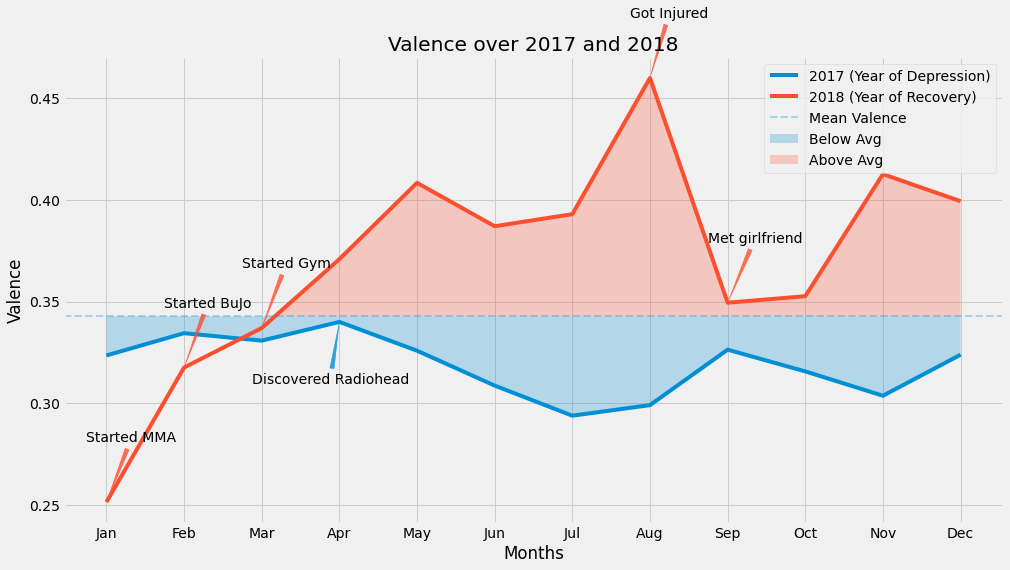

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(monthly_17['valence'].values, label='2017 (Year of Depression)')
ax.plot(monthly_18['valence'].values, label='2018 (Year of Recovery)')

plt.axhline(mean_valence, linestyle= '--', linewidth='2', alpha=0.3, label='Mean Valence')

# ax.plot(monthly_19['valence'].values, label='2019')

ax.set_title('Valence over 2017 and 2018')

ax.set_xticks(nums)
ax.set_xticklabels(month_names)

plt.xlabel('Months')
plt.ylabel('Valence')

xticks18 = [0, 1, 2, 7, 8]
yticks18 = monthly_18['valence'].values
yticks18 = yticks18[xticks18]

for x, y in zip(xticks18,yticks18):

    label = {0: 'Started MMA', 1:'Started BuJo', 2: 'Started Gym', 7: 'Got Injured', 8: 'Met girlfriend'}

    plt.annotate(label[x], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,60), # distance from text to points (x,y)
                 arrowprops = dict(facecolor='#fc4f30', color='#fc4f30', alpha=0.8, arrowstyle='wedge'))
                #  ha='center') # horizontal alignment can be left, right or center

yticks17 = monthly_17['valence'].values
yticks17 = yticks17[3]

plt.annotate('Discovered Radiohead',
                (3,yticks17),
                xytext=(0.2, 0.3), 
                textcoords="axes fraction",
                arrowprops= dict(facecolor='#008fd5', color='#008fd5', alpha=0.8, arrowstyle='wedge'))


plt.fill_between(x_indexes, monthly_17['valence'], mean_valence, where=(monthly_17['valence'] < mean_valence), label = 'Below Avg', interpolate=True, alpha=0.25)

plt.fill_between(x_indexes, monthly_18['valence'], mean_valence, where=(monthly_18['valence'] > mean_valence), label = 'Above Avg', interpolate=True, alpha=0.25)

plt.legend(loc='best')

# plt.tight_layout() 


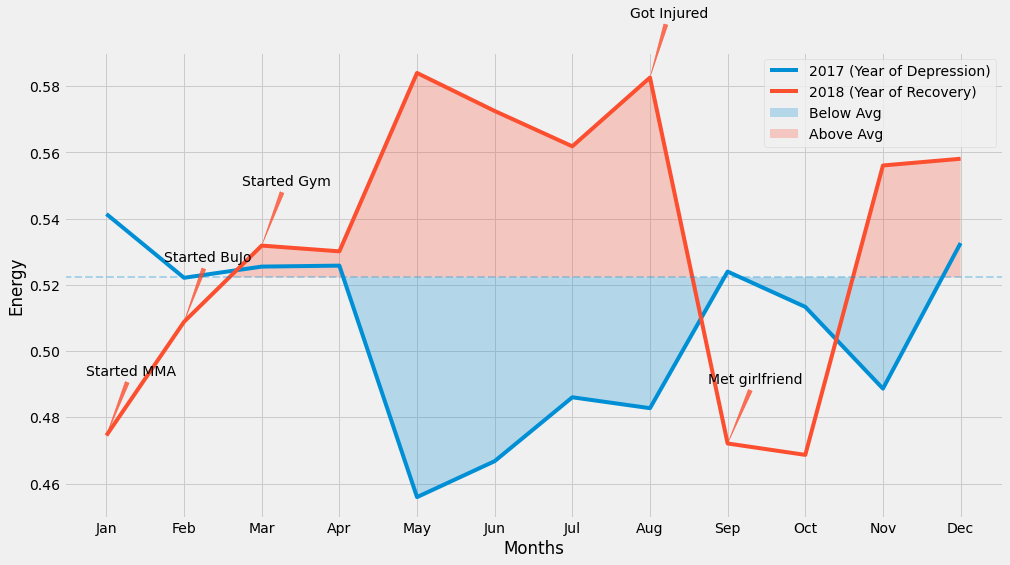

In [215]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(monthly_17['energy'].values, label='2017 (Year of Depression)')
ax.plot(monthly_18['energy'].values, label='2018 (Year of Recovery)')

plt.axhline(mean_energy, linestyle= '--', linewidth='2', alpha=0.3)

# ax.plot(monthly_19['energy'].values, label='2019')

ax.set_xticks(nums)
ax.set_xticklabels(month_names)

plt.xlabel('Months')
plt.ylabel('Energy')

xticks18 = [0, 1, 2, 7, 8]
yticks18 = monthly_18['energy'].values
yticks18 = yticks18[xticks18]

for x,y in zip(xticks18,yticks18):

    label = {0: 'Started MMA', 1:'Started BuJo', 2: 'Started Gym', 7: 'Got Injured',8: 'Met girlfriend'}

    plt.annotate(label[x], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-20,60), # distance from text to points (x,y)
                 arrowprops = dict(facecolor='#fc4f30', color='#fc4f30', alpha=0.8, arrowstyle='wedge'))
                #  ha='center') # horizontal alignment can be left, right or center

yticks17 = monthly_17['valence'].values
yticks17 = yticks17[3]

# plt.annotate('Discovered Radiohead',
#                 (3,yticks17),
#                 xytext=(0.2, 0.3), 
#                 textcoords="offset points",
#                 arrowprops= dict(facecolor='#008fd5', color='#008fd5', alpha=0.8, arrowstyle='wedge'))


plt.fill_between(x_indexes, monthly_17['energy'], mean_energy, where=(monthly_17['energy'] < mean_energy), label = 'Below Avg', interpolate=True, alpha=0.25)

plt.fill_between(x_indexes, monthly_18['energy'], mean_energy, where=(monthly_18['energy'] > mean_energy), label = 'Above Avg', interpolate=True, alpha=0.25)


plt.legend(loc='best')

# plt.tight_layout() 


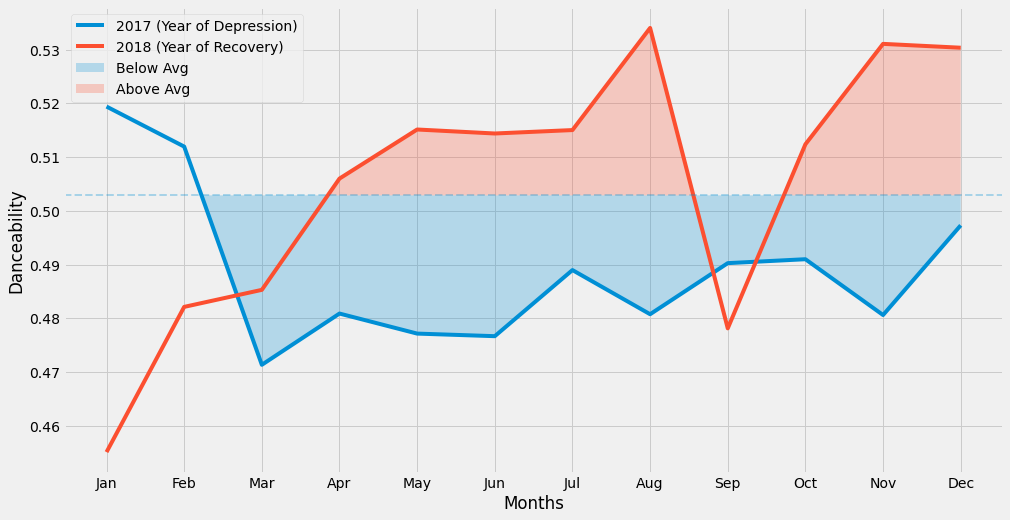

In [216]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(monthly_17['danceability'].values, label='2017 (Year of Depression)')
ax.plot(monthly_18['danceability'].values, label='2018 (Year of Recovery)')

plt.axhline(mean_danceability, linestyle= '--', linewidth='2', alpha=0.3)

# ax.plot(monthly_19['danceability'].values, label='2019')

ax.set_xticks(nums)
ax.set_xticklabels(month_names)

plt.xlabel('Months')
plt.ylabel('Danceability')

xticks18 = [0, 1, 2, 7, 8]
yticks18 = monthly_18['danceability'].values
yticks18 = yticks18[xticks18]

plt.fill_between(x_indexes, monthly_17['danceability'], mean_danceability, where=(monthly_17['danceability'] < mean_danceability), label = 'Below Avg', interpolate=True, alpha=0.25)

plt.fill_between(x_indexes, monthly_18['danceability'], mean_danceability, where=(monthly_18['danceability'] > mean_danceability), label = 'Above Avg', interpolate=True, alpha=0.25)


plt.legend(loc='best')

# plt.tight_layout() 


In [56]:
album_counts = features['album'].value_counts().head(10)

In [57]:
album_counts

OK Computer                    1197
twelvefour                     1090
The Search for Everything       833
In Rainbows                     799
Born and Raised                 748
A Moon Shaped Pool              695
Battle Studies                  684
Continuum                       664
In Absentia                     524
Where We Stood (In Concert)     519
Name: album, dtype: int64

In [58]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0) 

([<matplotlib.patches.Wedge at 0x1bd879cda00>,
 [Text(0.32545245914217674, 1.0507524431750372, 'OK Computer'),
  Text(-0.7034330699066316, 0.9722046678358071, 'twelvefour'),
  Text(-1.0850196402981915, 0.18092092241414007, 'The Search for Everything'),
  Text(-0.9674015534585637, -0.5235782982190513, 'In Rainbows'),
  Text(-0.4763395884072215, -0.9915142946604647, 'Born and Raised'),
  Text(0.15007615074766076, -1.0897142510661983, 'A Moon Shaped Pool'),
  Text(0.7049681013304052, -0.8444051018951766, 'Battle Studies'),
  Text(1.041027691638714, -0.35533272469809285, 'Continuum'),
  Text(1.0872404671364626, 0.16705737523643424, 'In Absentia'),
  Text(0.923055142537836, 0.5983052764554693, 'Where We Stood (In Concert)')],
 [Text(0.17751952316846, 0.573137696277293, '15.4%'),
  Text(-0.4103359574455351, 0.5671193895708874, '14.1%'),
  Text(-0.5918288947081044, 0.09868413949862186, '10.7%'),
  Text(-0.527673574613762, -0.2855881626649371, '10.3%'),
  Text(-0.25982159367666624, -0.54082597

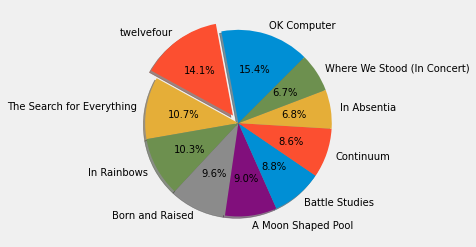

In [59]:
plt.pie(album_counts, startangle=45, labels=album_counts.index, textprops={'fontsize': 10}, autopct='%1.1f%%', explode=explode, shadow=True)

In [221]:
features['key'].value_counts()

D        9230
C        8479
A        7856
G        7491
E/F♭     6590
F/E♯     5415
C♯/D♭    5282
B/C♭     5172
F♯/G♭    4264
A♯/B♭    3534
G♯/A♭    3447
D♯/E♭    2366
Name: key, dtype: int64

In [60]:
x_indexes = np.arange(len(daily_may))
width = 0.25

In [61]:
sample = features.sample(1000)
dupes = features.reset_index()
dupes.drop('timestamp', axis=1, inplace=True)
dupes.drop_duplicates(inplace=True)

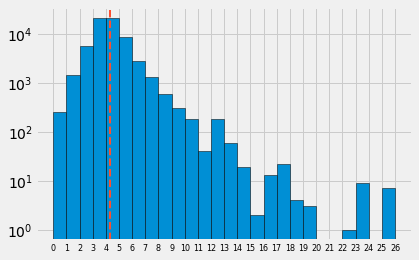

In [224]:
fig, ax = plt.subplots()
bins = np.arange(0, 27, 1)
ax.hist(dupes['length in mins'], edgecolor='black', bins=bins, log=True)
ax.axvline(mean_length, color='#fc4f30', label='Mean Length', linewidth=2, ls='--')

ax.set_xticks(bins)
ax.set_xticklabels(bins, fontdict=dict(fontsize=8))
plt.show()

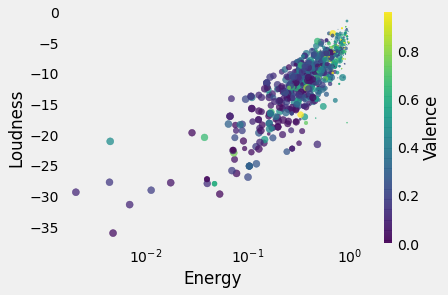

In [460]:
valence = sample['valence']
acousticness = sample['acousticness']

fig, ax = plt.subplots()

ax.grid(False)
ax = plt.scatter(sample['energy'], sample['loudness'], c=valence, s=acousticness*50, alpha=0.75)
plt.xscale('log')
plt.xlabel('Energy')
plt.ylabel('Loudness')
cbar = plt.colorbar()
cbar.set_label('Valence')

In [226]:
rh = dupes[dupes['artist'] == 'Radiohead']
ir = rh[rh['album'] == 'In Rainbows']
amsp = rh[rh['album'] == 'A Moon Shaped Pool']

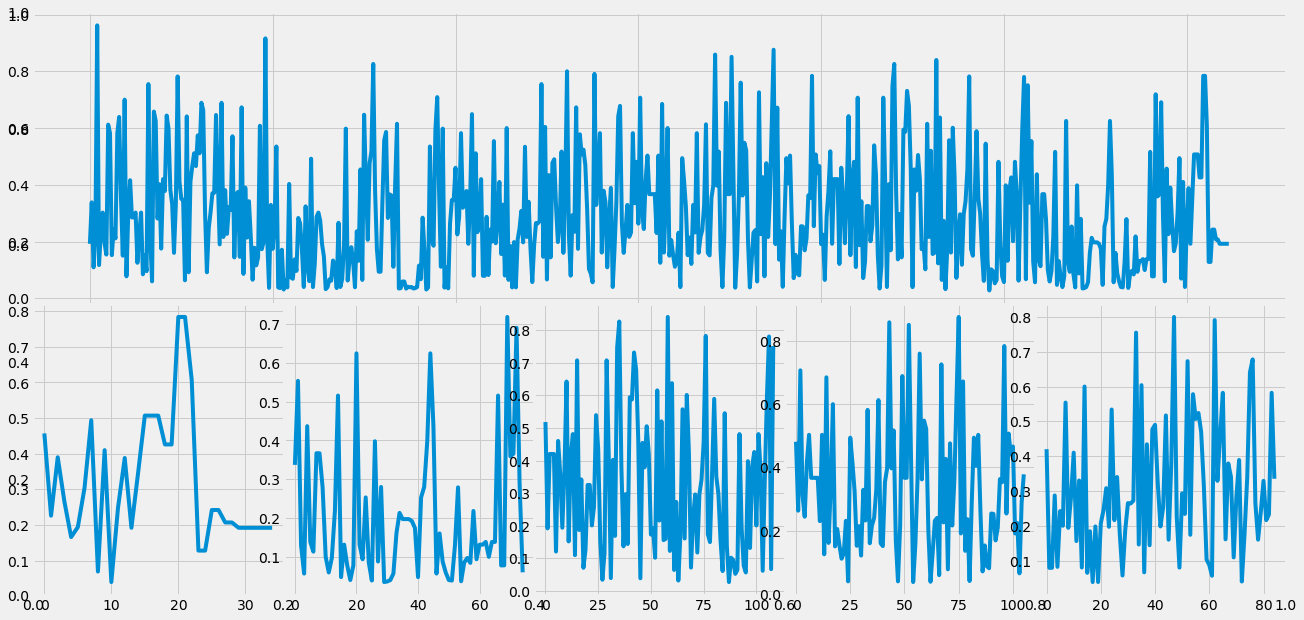

In [230]:
fig = plt.figure(figsize=(20,10))

grid = plt.GridSpec(2, 5, wspace=0, hspace=0)

plt.ylim(0,1)

mainax = fig.add_subplot(grid[0, :5])
ax1 = fig.add_subplot(grid[1, 0])
ax2 = fig.add_subplot(grid[1, 1])
ax3 = fig.add_subplot(grid[1, 2])
ax4 = fig.add_subplot(grid[1, 3])
ax5 = fig.add_subplot(grid[1, 4])

mainax.plot(week['valence'].values)
ax1.plot(week['2017-01-01']['valence'].values)
ax2.plot(week['2017-01-02']['valence'].values)
ax3.plot(week['2017-01-03']['valence'].values)
ax4.plot(week['2017-01-04']['valence'].values)
ax5.plot(week['2017-01-05']['valence'].values)

In [62]:
grouped = features.groupby(['year', 'week'])
groups = grouped.groups

In [63]:
list = [k for k in groups.keys()] 

In [64]:
week1 = grouped.get_group(list[85]).groupby('dow').count()['track']
week2 = grouped.get_group(list[86]).groupby('dow')['track'].count()

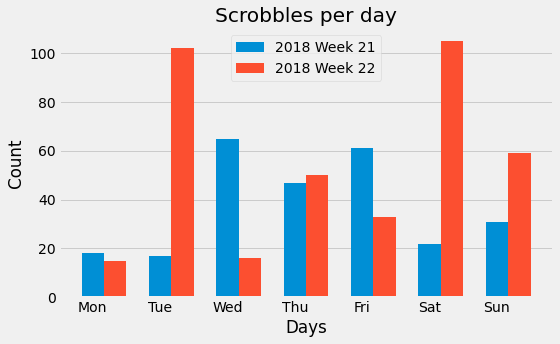

In [454]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(week1.index, week1, label=f'{list[85][0]} Week {list[85][1]}', width=width)

ax.bar(week2.index + width, week2, label=f'{list[86][0]} Week {list[86][1]}', width=width)

ax.set_xticks(week1.index)
ax.set_xticklabels(dmap.values())

ax.xaxis.grid(False)

plt.title('Scrobbles per day')
plt.xlabel('Days')
plt.ylabel('Count')

plt.tight_layout() 
plt.legend()

In [7]:
vfar = pd.read_csv('..\spotify\Spreadsheets\Playlists\Voices From Another Room.csv')
vfar

,artist,album,track_name,track_id,popularity,genres,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Barrie,Happy To Be Here,Geology,4qCfbDTCrFnfG5fYngu2wE,48,"['brooklyn indie', 'indie pop']",0.690,0.721,4,-8.437,1,0.0323,0.649000,0.1250,0.3570,104.027,268120,4
1,"Astronauts, etc.",Mind Out Wandering,Up for Grabs,2gyXXC4IMj8K4HfUNUvqKO,24,"['bay area indie', 'shiver pop']",0.539,0.525,5,-10.910,1,0.0285,0.234000,0.1050,0.5350,175.972,176627,4
2,CASTLEBEAT,CASTLEBEAT,Change Your Mind,4omurqpm7aWH9VVz2Ii4yO,53,"['bedroom pop', 'dreamo', 'indie garage rock',...",0.384,0.578,11,-9.624,1,0.0312,0.886000,0.1250,0.0984,150.013,297273,4
3,You'll Never Get to Heaven,Images,Beyond the Clouds,6vMaCzTnismT6N45MDCMfa,39,"['ambient pop', 'london on indie', 'nu gaze']",0.633,0.575,7,-9.667,0,0.0298,0.924000,0.1050,0.2390,117.520,248681,4
4,Day Wave,Drag,Drag,0oXwUeFAE6IR2lYhaTpxRT,59,"['bay area indie', 'chillwave', 'dreamo', 'ind...",0.537,0.713,7,-6.250,1,0.0272,0.650000,0.1000,0.3670,93.198,189651,4
5,Voka Gentle,Branscombe,Branscombe,4mrOXzvbS0U0KsX7O6OqIo,42,[],0.556,0.389,7,-15.394,1,0.0290,0.887000,0.1110,0.0865,111.012,439478,4
6,Acid Ghost,All Alone,All Alone,72xnRXxHiAhTfKSzlPdEmo,54,['indie garage rock'],0.509,0.588,0,-9.542,1,0.0298,0.845000,0.1150,0.4870,171.845,168648,4
7,The F16s,Amber,Amber,62bHWlIlUW6fbwBO29h64H,36,"['chennai indie', 'indian indie', 'indian rock']",0.299,0.468,2,-10.777,1,0.0259,0.770000,0.2240,0.5930,95.069,206704,4
8,The Shutes,Echo of Love,Bright Blue Berlin Sky,6P30NMoLLzWTuue4faRjsd,42,['isle of wight indie'],0.534,0.626,6,-8.549,0,0.0288,0.034500,0.1090,0.3770,120.920,344633,4
9,Electric Youth,Memory Emotion,Breathless,6bgUlpf4HVpuTdo5LuBTov,34,"['filter house', 'popwave', 'synthwave']",0.618,0.623,2,-7.899,1,0.0267,0.841000,0.1020,0.3330,97.984,271683,4


In [22]:
vfar_mean_energy = vfar['energy'].mean()

In [23]:
x_indexes = np.arange(len(vfar))
x_indexes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [24]:
vfar_energy = vfar['energy']

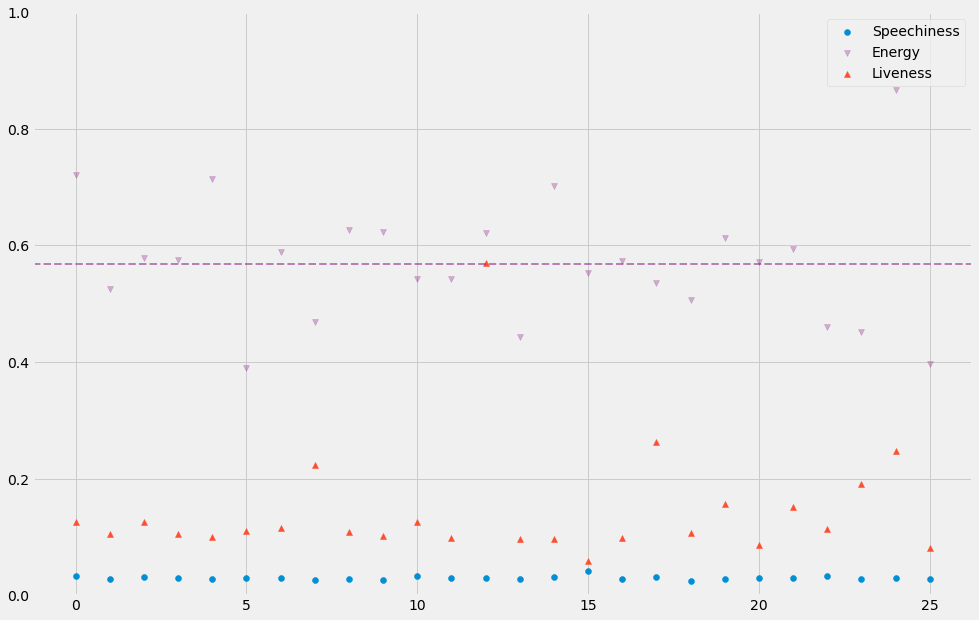

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

plt.ylim(0, 1)
ax=plt.scatter(x_indexes, vfar['speechiness'], marker='o', label='Speechiness')
ax=plt.scatter(x_indexes, vfar['energy'], marker='v', label='Energy', color=colors[5], alpha=0.3)
plt.axhline(vfar_mean_energy, linestyle= '--', linewidth='2', alpha=0.5, color=colors[5])
ax=plt.scatter(x_indexes, vfar['liveness'], marker='^', label='Liveness')

for x,y in zip(x_indexes, vfar_energy):

    label = vfar.iloc[x_indexes, 2]

    # plt.annotate(label[x], # this is the text
    #              (x, y), # this is the point to label
    #              textcoords="offset points", # how to position the text
    #              xytext=(-20, random.randint(-150, -60)), # distance from text to points (x,y)
    #              arrowprops = dict(facecolor='#fc4f30', color=colors[5], alpha=0.8, arrowstyle='wedge'))
                #  ha='center') # horizontal alignment can be left, right or center


plt.legend()

In [15]:
kindie = pd.read_csv('..\spotify\Spreadsheets\Playlists\k not so pop.csv')
kindie

,artist,album,track_name,track_id,popularity,genres,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Fuyumi Abe,沈黙の恋人,希望のうた,24dq1uvUoVVQ6WMwFTqUPl,37,['j-acoustic'],0.384,0.0751,2,-16.534,1,0.0436,0.000001,0.1320,0.254,162.503,245747,3
1,The Black Skirts,Hollywood,Hollywood,4kqN6K6J1nM18zivvFLx8v,17,"['k-indie', 'k-rock', 'korean dream pop', 'kor...",0.552,0.7820,1,-8.082,0,0.0302,0.900000,0.1000,0.509,147.956,331000,4
2,HYUKOH,24 : How to find true love and happiness,LOVE YA!,7rDdN55Ma9gZlbexHiDSud,23,"['k-indie', 'korean indie folk', 'korean r&b']",0.375,0.5660,11,-6.527,1,0.0448,0.000016,0.1460,0.330,143.770,251965,4
3,The Chairs,LOVELY SUNDAY,Rollin' On,63oSPrP54in4X41vq6cNlL,43,['chinese indie'],0.687,0.5560,5,-9.366,1,0.0286,0.018900,0.1820,0.517,103.907,234600,4
4,ADOY,LOVE,Wonder,0v89jw9S9NPzOPCoZnLZxE,2,"['k-indie', 'korean city pop', 'korean dream p...",0.661,0.7370,6,-6.317,1,0.0287,0.544000,0.1150,0.532,99.989,235747,4
5,ADOY,CATNIP,Grace,6hpWk3kV9phxtzxbzzXmIF,47,"['k-indie', 'korean city pop', 'korean dream p...",0.622,0.7010,1,-6.273,0,0.0312,0.000028,0.0965,0.638,100.007,245280,4
6,The Chairs,The Chairs on Audiotree Live,Rollin' On - Audiotree Live Version,2oPgiaiXfijOeDAeA7eL4C,13,['chinese indie'],0.686,0.4660,5,-10.798,1,0.0257,0.000182,0.1710,0.626,103.982,232233,4
7,Various Artists,CINEMA SESSIONS 2019,Rollin' On,12HcAJuzuH2Rr9xBNJ98t2,5,[],0.705,0.5760,5,-8.043,1,0.0289,0.000009,0.3500,0.558,104.056,244629,4
8,Sunday Moon,City Lights,City Lights,36xcAYhiCUnzBoydVmxkO3,45,['k-indie'],0.602,0.3030,6,-7.978,1,0.0451,0.091000,0.1450,0.327,135.990,241699,4
9,SURL,Aren't You?,The Lights Behind You,6O1OrHXMWpJbhmWSJnncw1,1,"['k-indie', 'korean indie rock']",0.492,0.5500,9,-3.421,1,0.0320,0.001840,0.1500,0.382,80.987,312640,4


In [29]:
x_indexes = np.arange(len(kindie))

In [30]:
 pd.set_option('display.max_rows', None)

In [31]:
corr = kindie.corr() 
s = corr.unstack()
so = s.abs().sort_values(ascending=False)
print(so)

popularity        popularity          1.000000
danceability      danceability        1.000000
duration_ms       duration_ms         1.000000
tempo             tempo               1.000000
valence           valence             1.000000
liveness          liveness            1.000000
instrumentalness  instrumentalness    1.000000
mode              mode                1.000000
loudness          loudness            1.000000
key               key                 1.000000
energy            energy              1.000000
speechiness       speechiness         1.000000
time_signature    time_signature      1.000000
loudness          time_signature      0.823880
time_signature    loudness            0.823880
                  energy              0.742849
energy            time_signature      0.742849
                  loudness            0.718837
loudness          energy              0.718837
danceability      speechiness         0.698304
speechiness       danceability        0.698304
valence      

In [32]:
mean_dance = kindie['danceability'].mean()

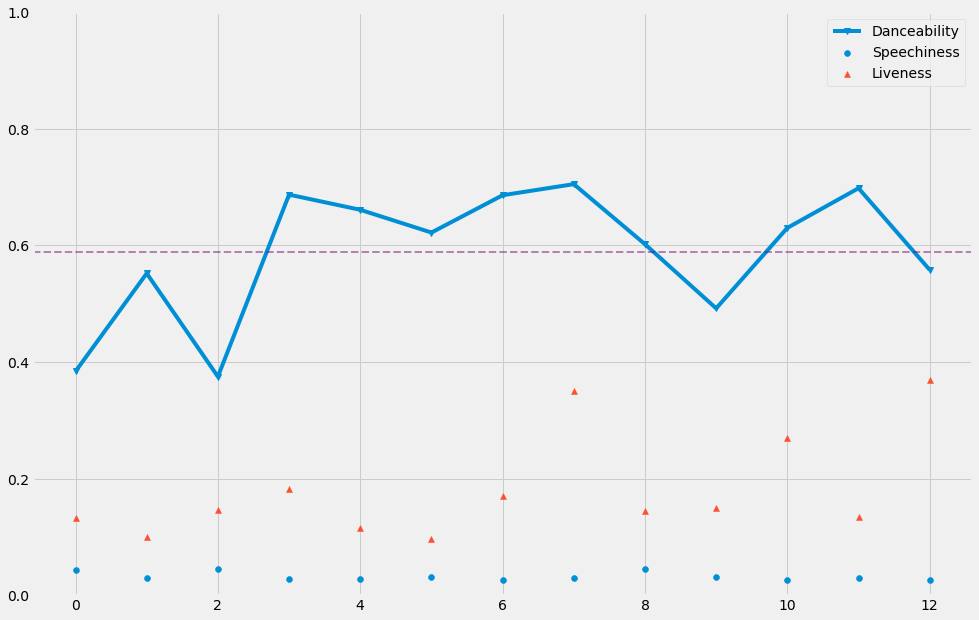

In [34]:
fig, ax = plt.subplots(figsize=(15,10))

plt.ylim(0, 1)
ax=plt.scatter(x_indexes, kindie['speechiness'], marker='o', label='Speechiness')
ax=plt.scatter(x_indexes, kindie['liveness'], marker='^', label='Liveness')
ax=plt.plot(x_indexes, kindie['danceability'], marker='v', label='Danceability')
plt.axhline(mean_dance, linestyle= '--', linewidth='2', alpha=0.5, color=colors[5])

plt.legend()

In [39]:
gxn = pd.read_csv('..\spotify\Spreadsheets\Playlists\Gadha x Nidhi Archive.csv')
gxn

,artist,album,track_name,track_id,popularity,genres,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,half•alive,still feel.,still feel.,4EcYqXGZ1MOl7gBLcRO9Ya,57,"['indie pop', 'modern alternative rock', 'mode...",0.779,0.525,10,-5.756,0,0.0487,0.000000,0.0675,0.6980,120.018,247438,4
1,Better Oblivion Community Center,Better Oblivion Community Center,Service Road,0AODUbeAlQFw4jsyoWtB6U,48,"['indie pop', 'indie rock']",0.540,0.548,0,-10.303,1,0.0405,0.000038,0.1350,0.5250,83.876,224333,4
2,Beeches,Famous Friends,Blackbird,0JkSXJb0s0UG8sazEhUSxF,38,['pop folk'],0.512,0.418,8,-12.131,1,0.0271,0.023400,0.1120,0.5920,85.031,229059,4
3,The Paper Kites,twelvefour,Bleed Confusion,5cEmrGyQcCjzC994LocIjs,37,"['australian indie folk', 'indie folk', 'stomp...",0.560,0.406,2,-11.134,1,0.0310,0.612000,0.1080,0.0644,74.994,261027,4
4,Elliott Smith,Either/Or: Expanded Edition,Pictures of Me - Live,2wMFRRLOnHwPJIszMVkUhi,0,"['alternative rock', 'anti-folk', 'indie folk'...",0.471,0.299,3,-10.007,0,0.0635,0.000000,0.1270,0.2850,139.664,238211,4
5,Various Artists,If I Stay: Original Motion Picture Soundtrack:...,Heart Like Yours,6yaHCAtl9kA0K3FMumR2ph,0,[],0.497,0.259,7,-9.782,1,0.0330,0.000000,0.1020,0.3380,140.117,200560,3
6,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,1EzrEOXmMH3G43AXT1y7pA,84,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']",0.686,0.457,11,-8.322,1,0.0468,0.000000,0.1050,0.7180,150.953,242187,4
7,OK Go,Of the Blue Colour of the Sky (Extra Nice Edit...,Shooting The Moon,4StBMIFXJl9ObFMdeEQD6S,47,"['alternative rock', 'chicago indie', 'dance-p...",0.305,0.763,6,-7.551,1,0.0528,0.001430,0.2260,0.5500,146.685,200773,3
8,Red Hot Chili Peppers,Stadium Arcadium,Hard to Concentrate,37kTASujIfZZ27NV7PfIrf,57,"['alternative rock', 'funk metal', 'funk rock'...",0.641,0.502,7,-7.334,1,0.0251,0.000004,0.3110,0.3260,105.634,241840,4
9,The Kooks,Junk Of The Heart,Junk Of The Heart (Happy),5p50gxcAYYeWPrBVEPHgUt,28,"['brighton indie', 'modern rock', 'rock']",0.604,0.894,2,-5.000,1,0.0370,0.000000,0.0299,0.9010,145.017,187253,4


In [40]:
sample = gxn.sample(25)

In [41]:
sample

,artist,album,track_name,track_id,popularity,genres,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
80,John Mayer,I Guess I Just Feel Like,I Guess I Just Feel Like,1HNywa8Bk0TmzRwQrzhtPo,74,"['neo mellow', 'pop', 'pop rock', 'singer-song...",0.556,0.528,4,-8.033,1,0.0266,0.096400,0.1220,0.163,159.821,285480,4
92,Alvvays,Alvvays,"Archie, Marry Me",5HLes17mwCwKt81mi0Tk35,62,"['indie pop', 'indie rock', 'shoegaze', 'toron...",0.270,0.830,7,-4.592,1,0.0741,0.434000,0.1420,0.205,117.314,196560,4
33,Big Thief,Dandelion,Masterpiece - (solo),5cic8eTn6twPA0ArO8zcjR,51,"['art pop', 'brooklyn indie', 'chamber pop', '...",0.555,0.183,4,-8.580,1,0.0375,0.000000,0.1160,0.223,131.220,240955,4
90,Charli XCX,Boys,Boys,5o4yGlG0PfeVUa6ClIyOxq,67,"['art pop', 'candy pop', 'dance pop', 'electro...",0.867,0.545,2,-5.192,1,0.0625,0.000289,0.0505,0.525,139.943,162586,4
82,John Mayer,Room For Squares,Not Myself,24QhGejjYWG2CfbHRGLmEr,47,"['neo mellow', 'pop', 'pop rock', 'singer-song...",0.539,0.490,1,-7.258,1,0.0234,0.016600,0.1020,0.226,89.991,216573,4
49,Elliott Smith,Either/Or: Expanded Edition,Punch and Judy,13LcTfTWaNHGDgZHbxTaxk,0,"['alternative rock', 'anti-folk', 'indie folk'...",0.496,0.379,9,-12.901,0,0.0365,0.138000,0.1150,0.208,132.227,145707,4
18,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,3ZOEytgrvLwQaqXreDs2Jx,82,"['alternative rock', 'funk metal', 'funk rock'...",0.618,0.938,9,-3.442,1,0.0456,0.000000,0.1670,0.875,91.455,269000,4
10,The Ransom Collective,Traces,Open Road,1fi8KOnEM6Jz9moa2yGFgQ,28,"['pinoy indie', 'pinoy rock']",0.705,0.830,7,-6.082,1,0.0284,0.015400,0.2100,0.438,125.990,253131,4
27,The Band CAMINO,I Spend Too Much Time in My Room,I Spend Too Much Time in My Room,6XHikJpK06NoXaFwkH4tPL,50,"['electropop', 'hopebeat', 'indie cafe pop', '...",0.480,0.439,9,-7.221,1,0.0250,0.003850,0.5140,0.152,97.055,272378,4
17,Arctic Monkeys,AM,Do I Wanna Know?,5FVd6KXrgO9B3JPmC8OPst,88,"['garage rock', 'modern rock', 'permanent wave...",0.548,0.532,5,-7.596,1,0.0323,0.000263,0.2170,0.405,85.030,272394,4


In [42]:
x_indexes = np.arange(len(sample))

In [43]:
corr = sample.corr() 
s = corr.unstack()
so = s.abs().sort_values(ascending=False)
print(so)

popularity        popularity          1.000000
danceability      danceability        1.000000
duration_ms       duration_ms         1.000000
tempo             tempo               1.000000
valence           valence             1.000000
liveness          liveness            1.000000
instrumentalness  instrumentalness    1.000000
mode              mode                1.000000
loudness          loudness            1.000000
key               key                 1.000000
energy            energy              1.000000
speechiness       speechiness         1.000000
time_signature    time_signature      1.000000
energy            loudness            0.726670
loudness          energy              0.726670
valence           danceability        0.645334
danceability      valence             0.645334
time_signature    duration_ms         0.493925
duration_ms       time_signature      0.493925
loudness          mode                0.461256
mode              loudness            0.461256
speechiness  

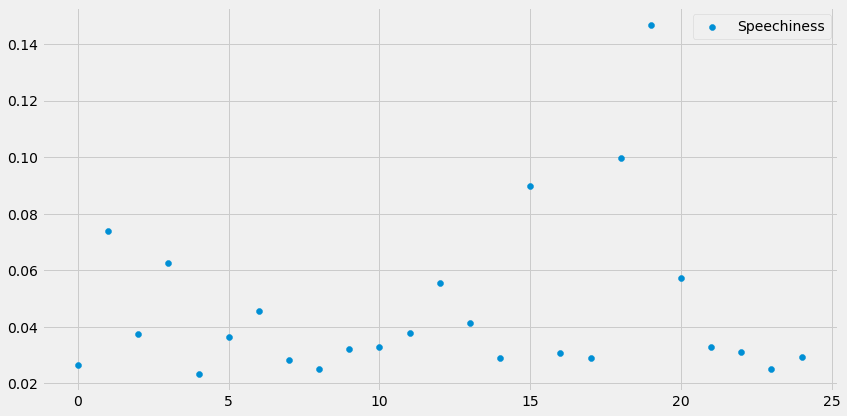

In [44]:
fig, ax1 = plt.subplots(figsize=(12,6))

# ax1.set_ylim(0, 1)
ax1=plt.scatter(x_indexes, sample['speechiness'], marker='o', label='Speechiness')

# ax1=plt.scatter(x_indexes, sample['energy'], marker='^', label='Energy')
# ax1=plt.scatter(x_indexes, sample['valence'], marker='v', label='Valence')

# ax2 = ax1.twinx()

# color = colors[3]
# ax2.set_ylabel('Loudness', color=color)  
# ax2.scatter(x_indexes, sample['loudness'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.legend()

In [45]:
vfar['reverb'] = 1
sample['reverb'] = 0
test = pd.concat([vfar, sample])

In [46]:
test.to_csv('Spreadsheets/Sample.csv', index=False)

In [47]:
test

,artist,album,track_name,track_id,popularity,genres,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,reverb
0,Barrie,Happy To Be Here,Geology,4qCfbDTCrFnfG5fYngu2wE,48,"['brooklyn indie', 'indie pop']",0.690,0.721,4,-8.437,1,0.0323,0.649000,0.1250,0.3570,104.027,268120,4,1
1,"Astronauts, etc.",Mind Out Wandering,Up for Grabs,2gyXXC4IMj8K4HfUNUvqKO,24,"['bay area indie', 'shiver pop']",0.539,0.525,5,-10.910,1,0.0285,0.234000,0.1050,0.5350,175.972,176627,4,1
2,CASTLEBEAT,CASTLEBEAT,Change Your Mind,4omurqpm7aWH9VVz2Ii4yO,53,"['bedroom pop', 'dreamo', 'indie garage rock',...",0.384,0.578,11,-9.624,1,0.0312,0.886000,0.1250,0.0984,150.013,297273,4,1
3,You'll Never Get to Heaven,Images,Beyond the Clouds,6vMaCzTnismT6N45MDCMfa,39,"['ambient pop', 'london on indie', 'nu gaze']",0.633,0.575,7,-9.667,0,0.0298,0.924000,0.1050,0.2390,117.520,248681,4,1
4,Day Wave,Drag,Drag,0oXwUeFAE6IR2lYhaTpxRT,59,"['bay area indie', 'chillwave', 'dreamo', 'ind...",0.537,0.713,7,-6.250,1,0.0272,0.650000,0.1000,0.3670,93.198,189651,4,1
5,Voka Gentle,Branscombe,Branscombe,4mrOXzvbS0U0KsX7O6OqIo,42,[],0.556,0.389,7,-15.394,1,0.0290,0.887000,0.1110,0.0865,111.012,439478,4,1
6,Acid Ghost,All Alone,All Alone,72xnRXxHiAhTfKSzlPdEmo,54,['indie garage rock'],0.509,0.588,0,-9.542,1,0.0298,0.845000,0.1150,0.4870,171.845,168648,4,1
7,The F16s,Amber,Amber,62bHWlIlUW6fbwBO29h64H,36,"['chennai indie', 'indian indie', 'indian rock']",0.299,0.468,2,-10.777,1,0.0259,0.770000,0.2240,0.5930,95.069,206704,4,1
8,The Shutes,Echo of Love,Bright Blue Berlin Sky,6P30NMoLLzWTuue4faRjsd,42,['isle of wight indie'],0.534,0.626,6,-8.549,0,0.0288,0.034500,0.1090,0.3770,120.920,344633,4,1
9,Electric Youth,Memory Emotion,Breathless,6bgUlpf4HVpuTdo5LuBTov,34,"['filter house', 'popwave', 'synthwave']",0.618,0.623,2,-7.899,1,0.0267,0.841000,0.1020,0.3330,97.984,271683,4,1
